https://www.ailab.ics.keio.ac.jp/b4_induction_training/docs/dl/mnist_notebook.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 正規化
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

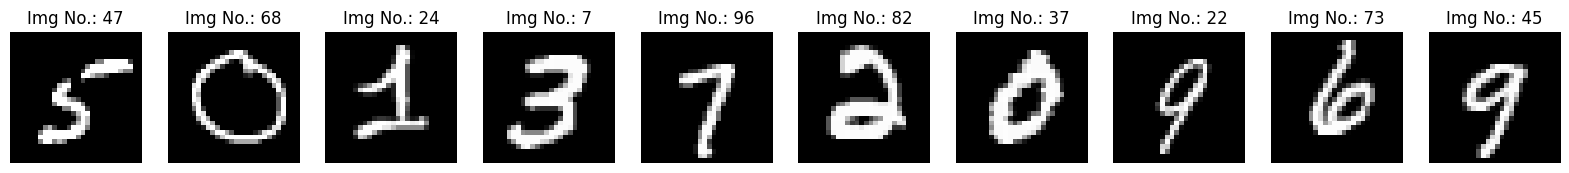

In [4]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in zip(np.random.randint(1, 100, 10), axs):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f'Img No.: {i}')
    ax.axis("off")

In [5]:
model = tf.keras.models.Sequential([

    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input"),
    
    # Layer1: Linear mapping: (None, 784) -> (None, 512)
    tf.keras.layers.Dense(512, name="fc_1"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_1"),
    
    # Layer2: Linear mapping: (None, 512) -> (None, 256)
    tf.keras.layers.Dense(256, name="fc_2"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_2"),
    
    # Layer3: Linear mapping: (None, 256) -> (None, 256)
    tf.keras.layers.Dense(256, name="fc_3"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_3"),
    
    # Layer4: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name="dense_3"),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name="softmax"),
])
model.summary()

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_3 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compiling
# Set model & training information into machine memory (CPU or GPU)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Set callback functions which are called during model training
CSV_FILE_PATH = 'tensorflow_test_02.csv'
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

# Train model
history = model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8866 - loss: 0.3943 - val_accuracy: 0.9690 - val_loss: 0.0987
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9733 - loss: 0.0860 - val_accuracy: 0.9780 - val_loss: 0.0745
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9843 - loss: 0.0502 - val_accuracy: 0.9771 - val_loss: 0.0747
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9807 - val_loss: 0.0679
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9908 - loss: 0.0273 - val_accuracy: 0.9803 - val_loss: 0.0692
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9919 - loss: 0.0234 - val_accuracy: 0.9763 - val_loss: 0.0811
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9753 - val_loss: 0.0856
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9949 - loss: 0.0155 - val

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.1297


(0.10600124299526215, 0.982699990272522)

In [ ]:
# Model evaluation
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9989 - loss: 0.0031
loss(train): 0.003257
accuracy(train): 0.999

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.1297
loss(test): 0.106
accuracy(test): 0.9827


In [ ]:
df = pd.read_csv(CSV_FILE_PATH)
df.tail(3)

,epoch,accuracy,loss,val_accuracy,val_loss
27,27,0.998300,0.006454,0.9826,0.105000
28,28,0.997983,0.007166,0.9818,0.100073
29,29,0.998150,0.007204,0.9827,0.106001


In [8]:
pd.options.display.float_format = '{:.05f}'.format
predictions = model.predict(x_test, verbose=0)
df_prob = pd.DataFrame(predictions)
df_prob['prob'] = df_prob.iloc[:, 0:10].idxmax(axis=1)
df_prob['y_test'] = y_test
df_prob.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,7,7
1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2,2
2,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,1


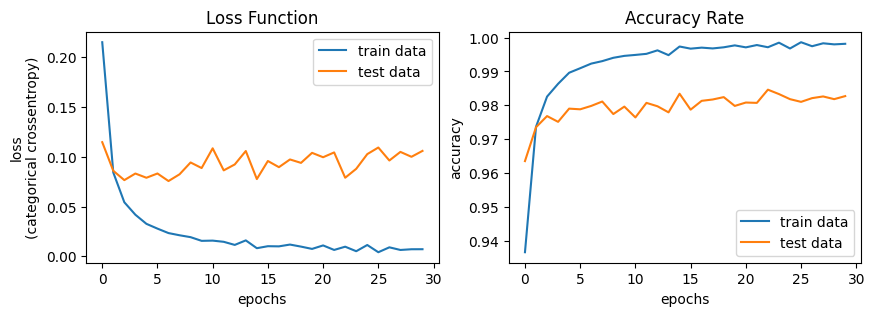

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(df['epoch'], df['loss'], label="train data")
axs[0].plot(df['epoch'], df['val_loss'], label="test data")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("loss\n(categorical crossentropy)")
axs[0].set_title('Loss Function')
axs[0].legend(loc="upper right")

axs[1].plot(df['epoch'], df['accuracy'], label="train data")
axs[1].plot(df['epoch'], df['val_accuracy'], label="test data")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("accuracy")
axs[1].set_title('Accuracy Rate')
axs[1].legend(loc="lower right")

plt.show()

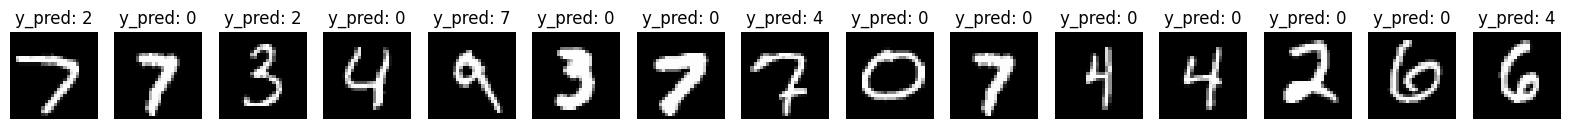

In [ ]:
display_num = 15
fig, axs = plt.subplots(1, display_num, figsize=(20, 3))
for i, ax in zip(np.random.randint(1, 100, display_num), axs):
    y_pred = df_prob.iloc[i, :10].idxmax()
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f'y_pred: {y_pred}')
    ax.axis("off")

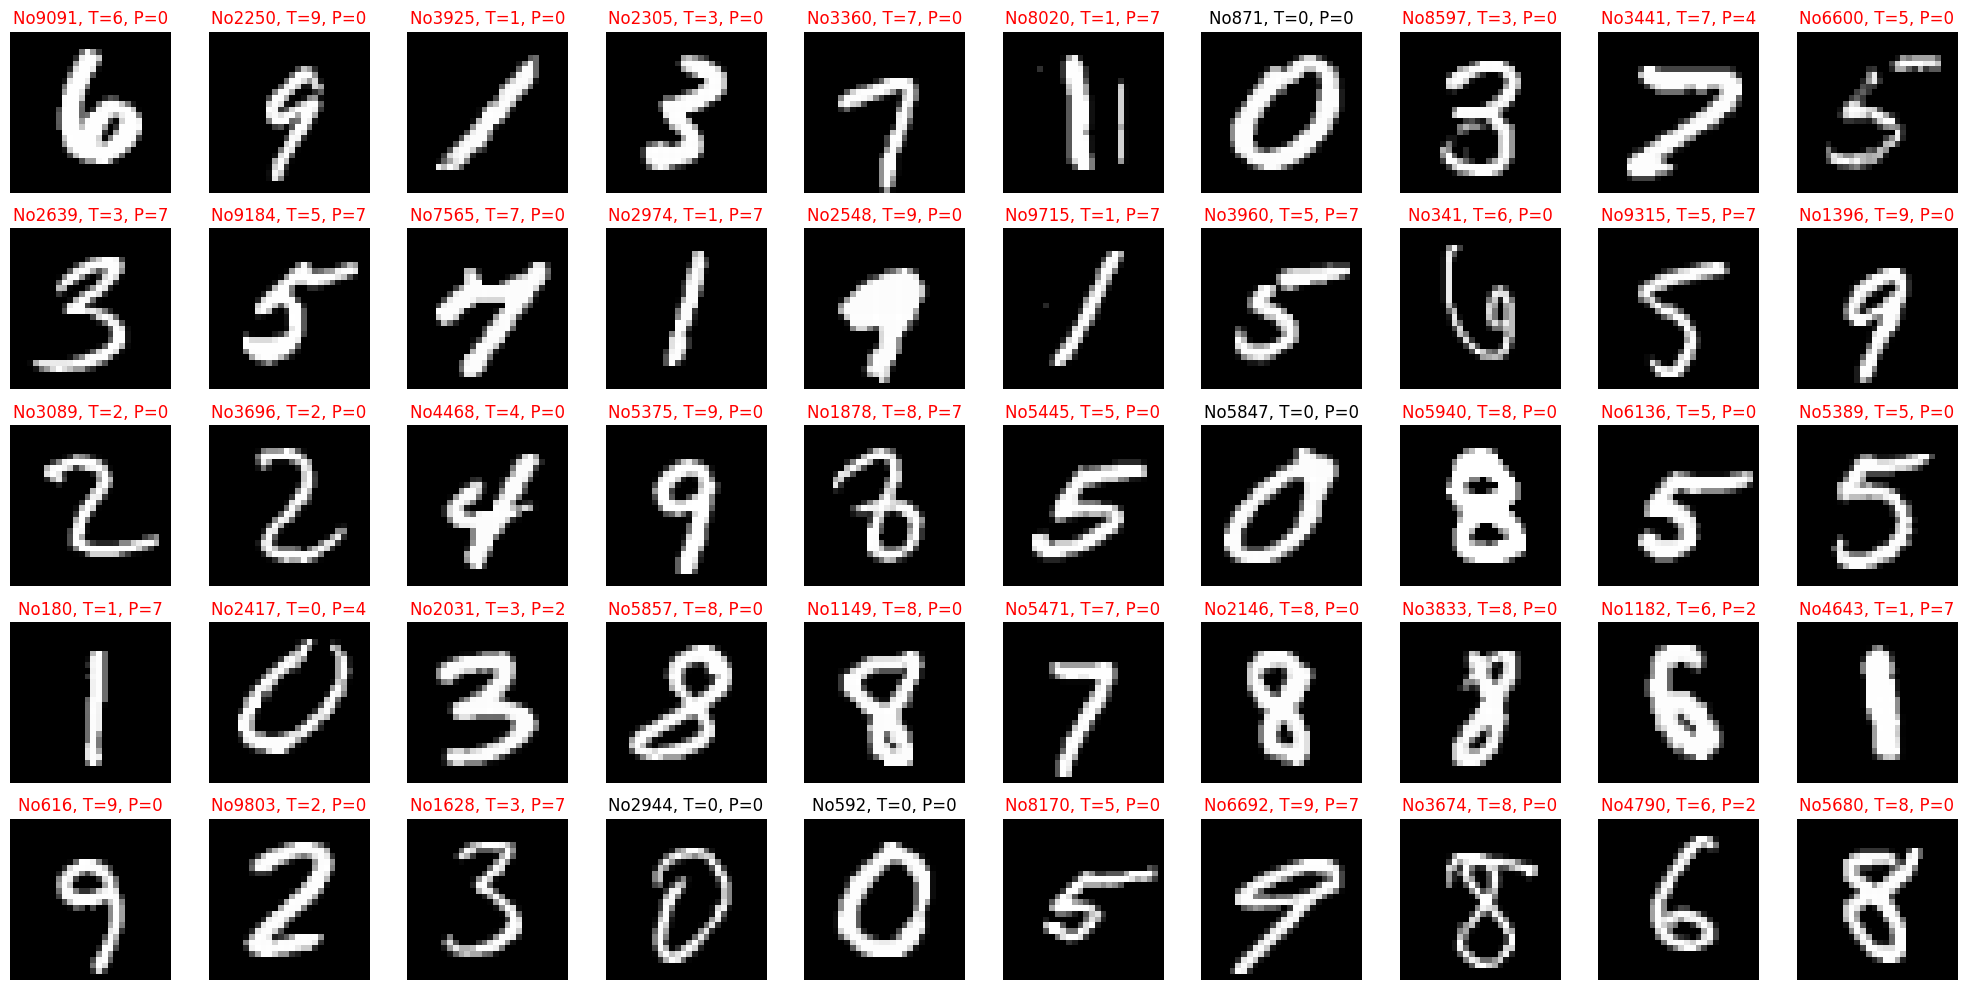

In [ ]:
# 50枚ランダムに確認
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(10000)
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df_prob.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'No{num}, T={y_}, P={pred}')
        if pred != y_:
            axs[i][j].set_title(f'No{num}, T={y_}, P={pred}', color='r')
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()

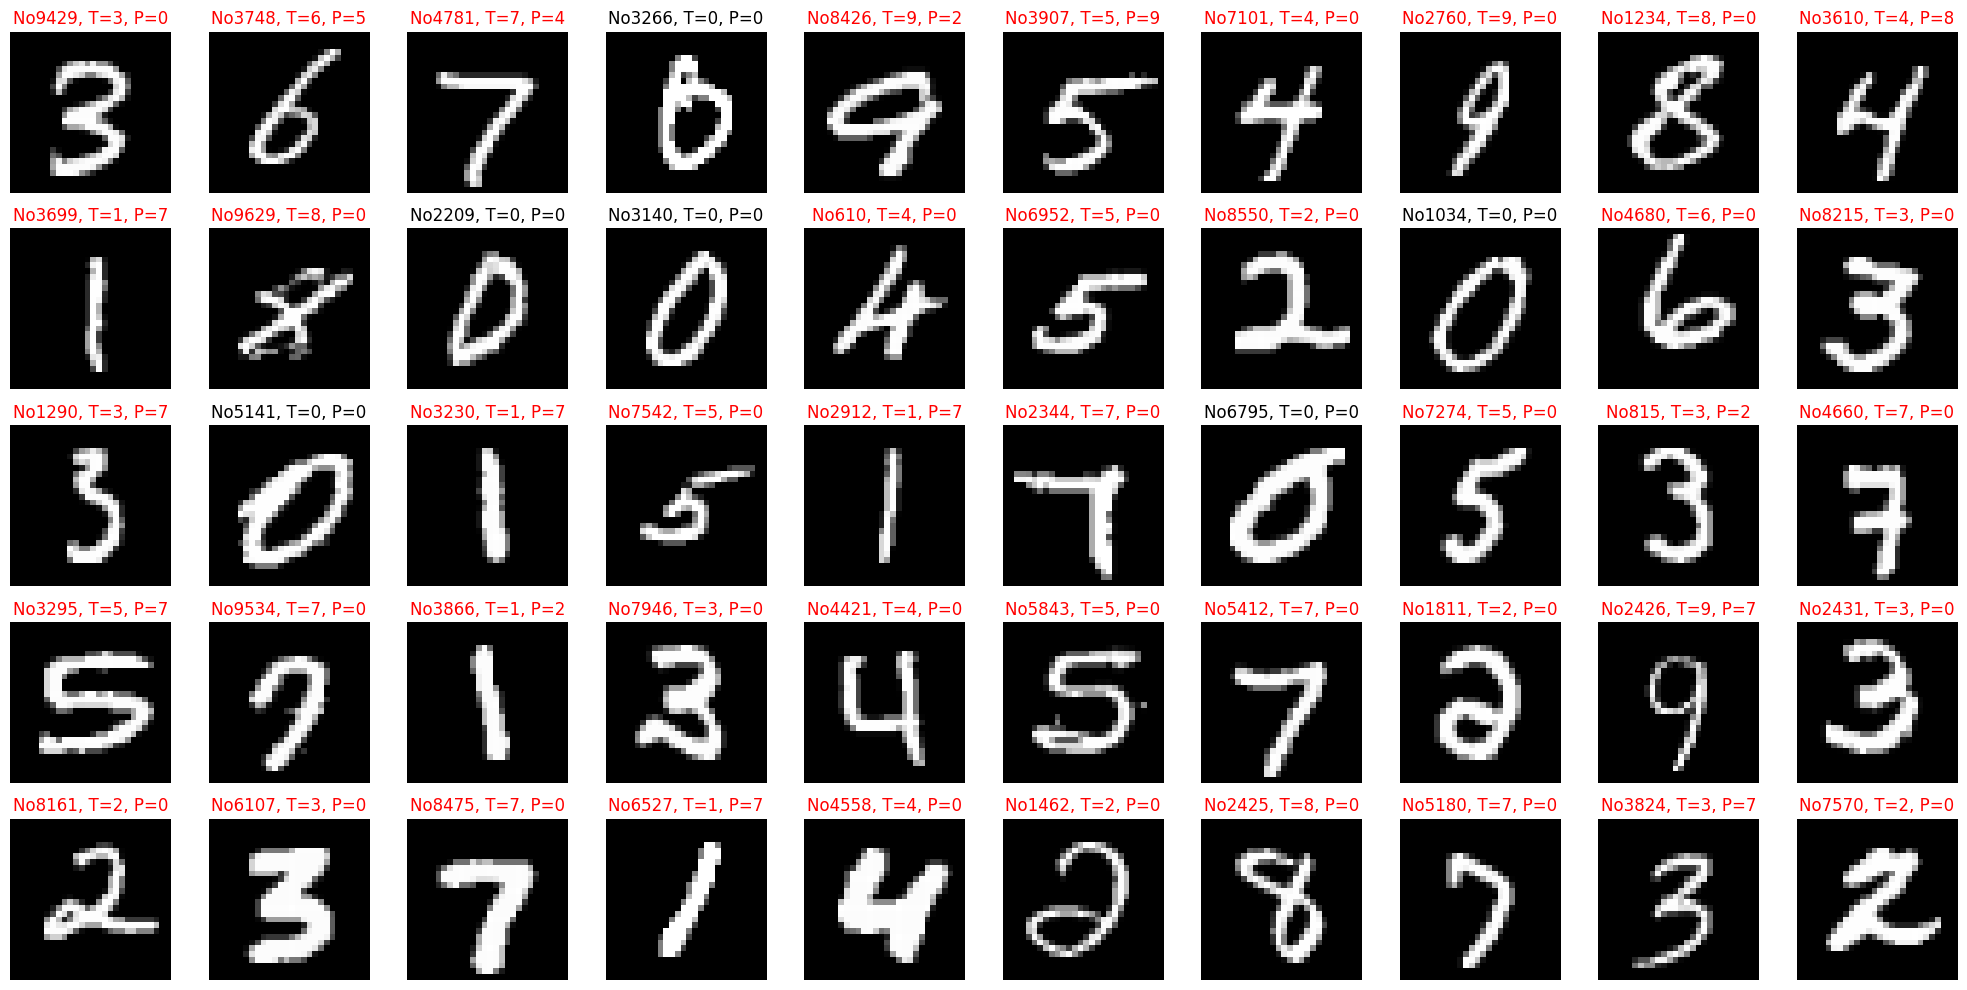

In [ ]:
# 1から50まで確認
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(10000)
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df_prob.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'No{num}, T={y_}, P={pred}')
        if pred != y_:
            axs[i][j].set_title(f'No{num}, T={y_}, P={pred}', color='r')
        axs[i][j].axis('off') 
plt.tight_layout()
plt.show()

In [ ]:
# 予測が異なる数
df_prob[df_prob['prob'] != df_prob['y_test']].count()[0]

8909